<a href="https://colab.research.google.com/github/Crush6666/ANAI/blob/main/%E5%99%AA%E5%A3%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [147]:
#load the data
test = pd.read_csv('nirtest.csv')
train = pd.read_csv('nirtrain4.csv')
val=pd.read_csv('nirval4.csv')
train.drop(columns='id', inplace = True)
test.drop(columns='id', inplace = True)
val.drop(columns='id', inplace = True)

In [148]:
y_train=train['target']
y_test=test['target']
y_val=val['target']
# x_train=train.drop(labels=['target'],axis=1)
# x_test=test.drop(labels=['target'],axis=1)
# x_val=val.drop(labels=['target'],axis=1)

In [149]:
scaler =  StandardScaler()
train = scaler.fit_transform(train)
test=scaler.fit_transform(test)
val= scaler.fit_transform(val)

In [150]:
x_train= np.expand_dims(train[:, 0:128].astype(float), axis=2)
x_test= np.expand_dims(test[:, 0:128].astype(float), axis=2)
x_val= np.expand_dims(val[:, 0:128].astype(float), axis=2)

In [151]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,Activation
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
model=Sequential()

model.add(Conv1D(filters=32, kernel_size=15, strides=1, padding='same',input_shape=(128,1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.1))
# 从卷积到全连接需要展平


model.add(Conv1D(filters=128, kernel_size=13, strides=1, padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.2))


model.add(Conv1D(filters=32, kernel_size=11, strides=1, padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))
model.add(Dropout(0.3))

# model.add(Conv1D(filters=32, kernel_size=13, strides=1, padding='same'))
# #model.add(BatchNormalization())
# model.add(Activation('relu'))
# #model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))
# #model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='relu'))

In [152]:
from keras import backend as K
# 自定义度量函数
# 自定义度量函数
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )




In [153]:
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error', metrics = [coeff_determination])
convergeAlarm = EarlyStopping(monitor='loss', min_delta=0, patience=50)
def lr_scheduler(epoch, lr):
    if epoch % 15 == 0 and epoch:
        return lr /1.15
    return lr

In [154]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=100, epochs=1000, verbose=2,shuffle=True, callbacks=[convergeAlarm])

Epoch 1/1000
4/4 - 1s - loss: 21.7828 - coeff_determination: -3.1647e-01 - val_loss: 21.6660 - val_coeff_determination: -1.5134e+00 - 804ms/epoch - 201ms/step
Epoch 2/1000
4/4 - 0s - loss: 21.5563 - coeff_determination: -2.9633e-01 - val_loss: 21.4799 - val_coeff_determination: -1.4501e+00 - 65ms/epoch - 16ms/step
Epoch 3/1000
4/4 - 0s - loss: 21.2834 - coeff_determination: -2.6965e-01 - val_loss: 21.4036 - val_coeff_determination: -1.3849e+00 - 76ms/epoch - 19ms/step
Epoch 4/1000
4/4 - 0s - loss: 21.1492 - coeff_determination: -2.3728e-01 - val_loss: 21.4564 - val_coeff_determination: -1.3439e+00 - 64ms/epoch - 16ms/step
Epoch 5/1000
4/4 - 0s - loss: 20.9976 - coeff_determination: -2.0215e-01 - val_loss: 21.5709 - val_coeff_determination: -1.3432e+00 - 69ms/epoch - 17ms/step
Epoch 6/1000
4/4 - 0s - loss: 21.0378 - coeff_determination: -1.7979e-01 - val_loss: 21.7479 - val_coeff_determination: -1.3643e+00 - 61ms/epoch - 15ms/step
Epoch 7/1000
4/4 - 0s - loss: 21.0554 - coeff_determinat

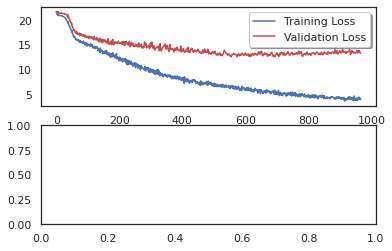

In [155]:
#Plot the loss and accuracy curves for training and validation
fig, ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss',axes=ax[0])
legend = ax[0].legend(loc='best',shadow=True)

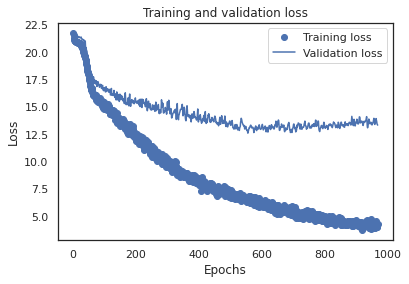

In [156]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
 
epochs = range(1, len(loss_values)+1)
 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

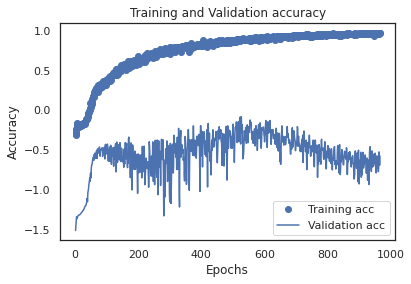

In [157]:
plt.clf()  #清空图像
acc = history_dict['coeff_determination']
val_acc = history_dict['val_coeff_determination']
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.show()


In [158]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
# 返回训练集数据预测值和真实值逆归一化的值
y_train_pred = model(x_train).cpu()


# 获得测试集预测值
y_test_pred = model(x_test)

# 计算误差
trainScore = mean_absolute_error(y_train,y_train_pred)
print('Train Score: %.6f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred)
print('Test Score: %.6f MAE' % (testScore))


# 计算误差
trainScore = mean_squared_error(y_train, y_train_pred)
print('Train Score: %.6f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred)
print('Test Score: %.6f MSE' % (testScore))


# 计算误差

trainScore = r2_score(y_train, y_train_pred)
print('Train Score: %.6f R2' % (trainScore))
testScore = r2_score(y_test, y_test_pred)
print('Test Score: %.6f R2' % (testScore))

Train Score: 2.483243 MAE
Test Score: 8.643467 MAE
Train Score: 27.177645 MSE
Test Score: 229.387981 MSE
Train Score: 0.982036 R2
Test Score: 0.848382 R2
